### Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
'''
asin-> Product ID from Amazon (str)
title-> Title of the product (str)
# stars-> Product rating. If 0, no ratings were found (float)
# reviews-> Number of customer reviews. If 0, no reviews were found. (int)
# price-> Price of the product. (float)
#isBestSeller-> Whether the product had the Amazon BestSeller status or not (bool)
# boughtInLastMount-> Indicates how many products we sold last month. (int)
category->Product category. (str)
'''

amz=pd.read_csv('amz_uk_price_prediction_dataset.csv',index_col='uid')

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [14]:
#Crosstab Analysis:
crosstab_result=pd.crosstab(amz['category'],(amz['isBestSeller'])).sort_values(by=True,ascending=False)
crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [15]:
#%porcentage solution
pd.crosstab(amz['category'],(amz['isBestSeller']),normalize='index').sort_values(by=True,ascending=False).round(3)*100

isBestSeller,False,True
category,,
Grocery,94.2,5.8
Smart Home Security & Lighting,94.2,5.8
Health & Personal Care,94.2,5.8
Mobile Phone Accessories,95.8,4.2
Power & Hand Tools,96.5,3.5
...,...,...
"CD, Disc & Tape Players",100.0,0.0
General Music-Making Accessories,100.0,0.0
Snowboard Boots,100.0,0.0


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [13]:
#2 Statistical Test
from scipy.stats import chi2_contingency
_,chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_p_value

0.0

In [11]:
from scipy.stats.contingency import association
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1935111467206869

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

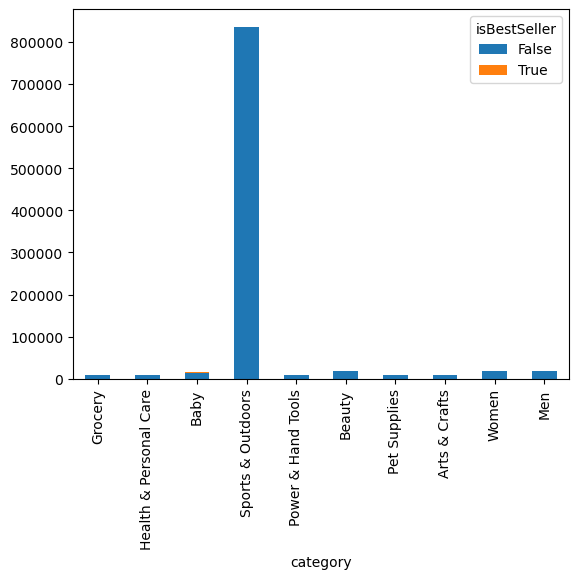

In [18]:
crosstab_result.head(10).plot(kind='bar',stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


In [ ]:
amz['price'].skew()

In [ ]:
amz.query('price<1000')['price'].hist(bins=100)

In [29]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [31]:
amz_out=amz.loc[~amz['price'].isin(tukeys_test_outliers(amz['price']))]

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.


In [32]:
top20=amz_out['category'].value_counts().head(20).index

In [ ]:
plt.figure(figsize=(16, 12))
sns.violinplot(amz_out.query('category in @top20'),x='category',y='price')
plt.xticks(rotation=90);

In [ ]:
amz_out.groupby('category')['price'].median().sort_values(ascending=False).head(10)


In [ ]:
amz.groupby('category')['price'].median().sort_values(ascending=False).head(10)

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [ ]:
top10=amz_out['category'].value_counts().head(10).index
sns.catplot(data=amz_out.query('category in @top10'),x='category',y='price',kind='bar',estimator='mean',height=8,aspect=1,errorbar=None)
plt.xticks(rotation=90);

In [ ]:
amz_out.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

In [ ]:
amz.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [ ]:
sns.catplot(data=amz_out.query('category in @top10'),x='category',y='stars',kind='box',height=8,aspect=1,errorbar=None)
plt.xticks(rotation=90);

In [ ]:
amz.groupby('category')['stars'].median().sort_values(ascending=False)

In [ ]:
amz_out.groupby('category')['stars'].median().sort_values(ascending=False)

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?


In [58]:
amz['price'].corr(amz['stars'])

-0.12490673262148641

In [59]:
amz[['price','stars']].corr()

,price,stars
price,1.000000,-0.124907
stars,-0.124907,1.000000


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


In [ ]:
sns.scatterplot(data=amz_out,x='stars',y='price') #shit thing is there is too many data

<Axes: xlabel='stars', ylabel='price'>

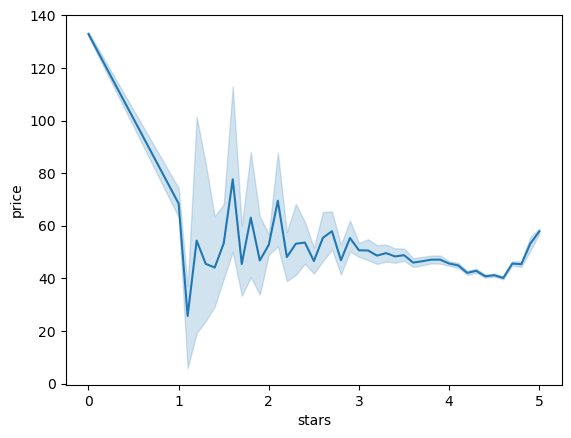

In [60]:
sns.lineplot(data=amz_out,x='stars',y='price')

In [ ]:
sns.relplot(data=amz_out,x='stars',y='price',kind='scatter')

In [ ]:
sns.lmplot(data=amz_out,x='stars',y='price')

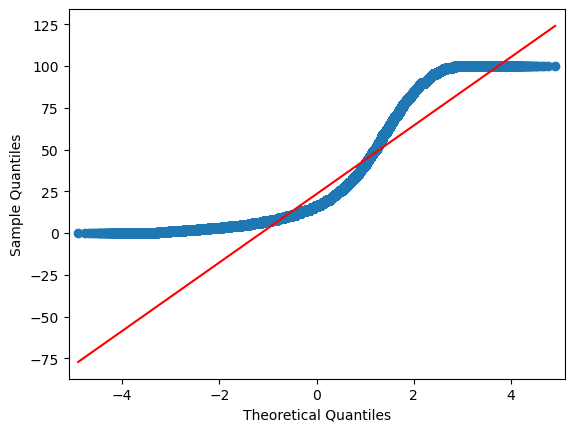

In [61]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(amz_out['price'], line='s');